# Importing Dependencies

In [13]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [14]:
# !pip install tensorflow

In [15]:
# !pip install matplotlib

# Checking versions

In [16]:
print(tf.__version__)
print(plt.matplotlib.__version__)

import matplotlib
print(matplotlib.__version__)

2.19.0
3.10.1
3.10.1


# Load data into tf Dataset

In [35]:
IMAGE_SIZE=128 #it is seen by choosing one image that can be any from the dataset then rightclick and see its properties > detail and we can see height and width or simply dimensions
BATCH_SIZE=32
CHANNELS=3

In [36]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    directory="Dataset",
    shuffle= True,
    image_size= (IMAGE_SIZE, IMAGE_SIZE),
    batch_size= BATCH_SIZE
)

Found 8982 files belonging to 3 classes.
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorSliceDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorSliceDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Equal in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Equal in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op LogicalAnd in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op SelectV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op DummySeedGenerator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ShuffleDatasetV3 in device /job:localhost/replica:0/task:0/dev

In [37]:
class_names=dataset.class_names
class_names

['mask_weared_incorrect', 'with_mask', 'without_mask']

In [38]:
len(dataset) #It is showing 281 cause every element in the dataset is actually the batch of 32 images 

Executing op DatasetCardinality in device /job:localhost/replica:0/task:0/device:CPU:0


281

In [39]:
281*32 # It shows the complete number of images in the dataset

8992

In [45]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(type(image_batch))
    print(label_batch.numpy())

Executing op TakeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AnonymousIteratorV3 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op IteratorGetNext in device /job:localhost/replica:0/task:0/device:CPU:0
(32, 128, 128, 3)
<class 'tensorflow.python.framework.ops.EagerTensor'>
[2 0 2 2 0 0 2 0 1 1 2 0 0 1 2 1 1 2 2 0 1 2 0 0 1 2 2 0 0 2 0 0]
Executing op IteratorGetNext in device /job:localhost/replica:0/task:0/device:CPU:0


# Data Visualization

Executing op TakeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AnonymousIteratorV3 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op IteratorGetNext in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op StridedSlice in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op StridedSlice in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op IteratorGetN

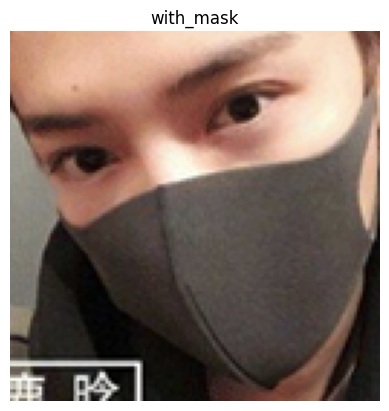

In [47]:
for image_batch, label_batch in dataset.take(1):  #everytime shows new image as it is shuffling
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    plt.title(class_names[label_batch[0]])
    plt.axis("off")

Executing op TakeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AnonymousIteratorV3 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op IteratorGetNext in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op StridedSlice in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op StridedSlice in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst 

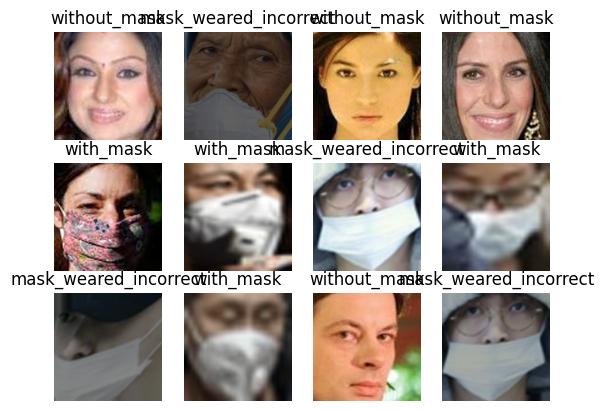

In [49]:
plt.figure()
for image_batch, label_batch in dataset.take(1): 
    for i in range(12):
        ax= plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")